<a href="https://colab.research.google.com/github/dori341/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armar un dataframe de 100 filas con datos random con apellido y nombre, nro dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible subjects
subjects = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música",
    "Ciudadanía", "Tecnología"
]

# Function to generate a random name
def generate_name():
  first_names = ["Juan", "Ana", "Pedro", "María", "José", "Laura", "Carlos", "Sofía", "Diego", "Valentina"]
  last_names = ["Gómez", "Rodríguez", "Pérez", "López", "Martínez", "González", "Sánchez", "Fernández", "García", "Torres"]
  return f"{random.choice(first_names)} {random.choice(last_names)}"


# Function to generate a random DNI
def generate_dni():
    return random.randint(10000000, 99999999)


# Create an empty list to store the data
data = []


# Generate 100 rows of data
for _ in range(100):
    row = {
        "Apellido y Nombre": generate_name(),
        "Nro DNI": generate_dni(),
        "Materia escolar": random.choice(subjects),
        "Nota 1er Trimestre": random.randint(1, 10),
        "Nota 2do Trimestre": random.randint(1, 10),
        "Nota 3er Trimestre": random.randint(1, 10),
        "Faltas a clases": random.randint(0, 20)
    }
    data.append(row)


# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame (optional)
df

,Apellido y Nombre,Nro DNI,Materia escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Sofía Rodríguez,44299205,Historia,1,4,10,18
1,Sofía Fernández,35742473,Tecnología,5,9,9,13
2,Pedro Martínez,79326833,Educación Física,6,10,8,17
3,Sofía López,28943924,Biología,5,5,10,5
4,María Fernández,85163549,Inglés,6,5,8,14
...,...,...,...,...,...,...,...
95,Juan Rodríguez,70518483,Matemática,1,7,5,6
96,Pedro González,27415306,Inglés,2,4,9,6
97,Carlos García,86734669,Lengua y Literatura,4,1,5,10
98,Sofía Gómez,63548843,Ciencias Naturales,8,8,8,7


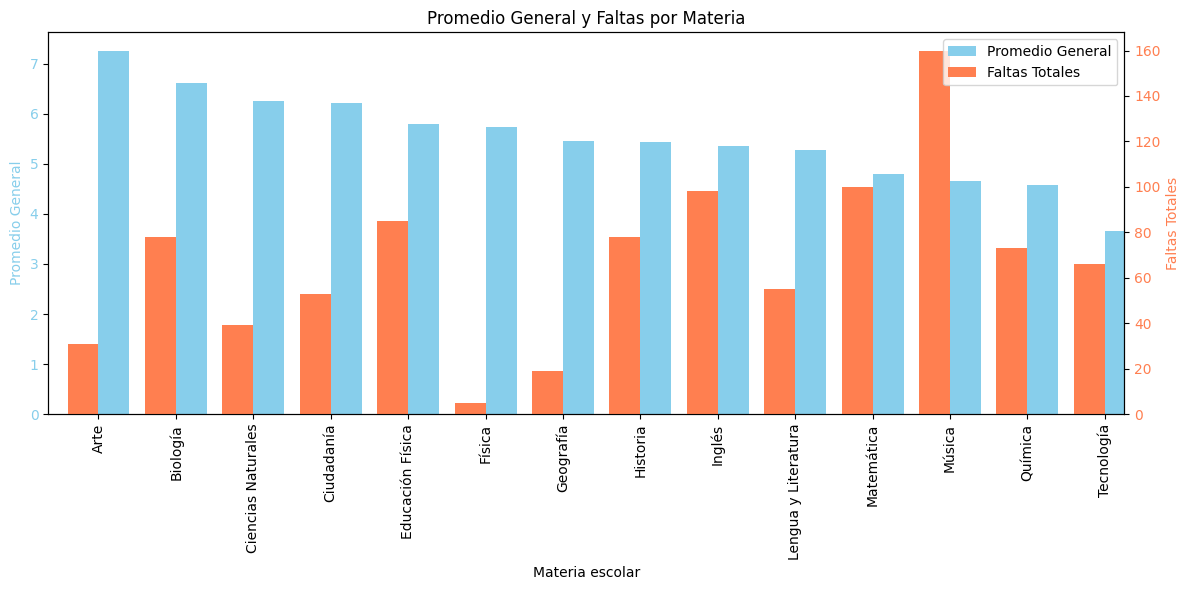

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby("Materia escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby("Materia escolar")["Faltas a clases"].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind="bar", ax=ax1, color="skyblue", position=0, width=0.4, label="Promedio General")
ax1.set_ylabel("Promedio General", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind="bar", ax=ax2, color="coral", position=1, width=0.4, label="Faltas Totales")

ax2.set_ylabel("Faltas Totales", color="coral")
ax2.tick_params(axis="y", labelcolor="coral")

# Set plot title and labels
plt.title("Promedio General y Faltas por Materia")
plt.xlabel("Materia Escolar")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)